## Face and Facial Keypoint detection

After you've trained a neural network to detect facial keypoints, you can then apply this network to *any* image that includes faces. The neural network expects a Tensor of a certain size as input and, so, to detect any face, you'll first have to do some pre-processing.

1. Detect all the faces in an image using a face detector (we'll be using a Haar Cascade detector in this notebook).
2. Pre-process those face images so that they are grayscale, and transformed to a Tensor of the input size that your net expects. This step will be similar to the `data_transform` you created and applied in Notebook 2, whose job was tp rescale, normalize, and turn any iimage into a Tensor to be accepted as input to your CNN.
3. Use your trained model to detect facial keypoints on the image.

---

In the next python cell we load in required libraries for this section of the project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


#### Select an image 

Select an image to perform facial keypoint detection on; you can select any image of faces in the `images/` directory.

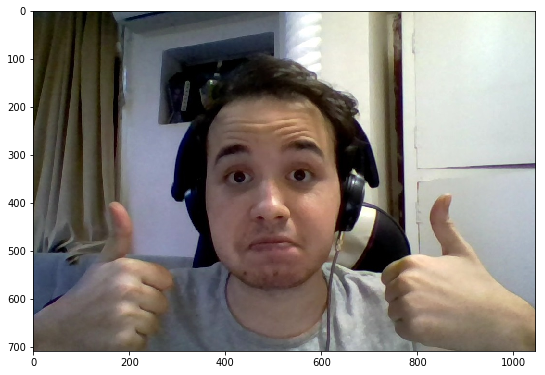

In [2]:
import cv2
# load in color image for face detection
image = cv2.imread('images/hermas.png')

# switch red and blue color channels 
# --> by default OpenCV assumes BLUE comes first, not RED as in many images
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(image)

## Detect all faces in an image

Next, you'll use one of OpenCV's pre-trained Haar Cascade classifiers, all of which can be found in the `detector_architectures/` directory, to find any faces in your selected image.

In the code below, we loop over each face in the original image and draw a red square on each face (in a copy of the original image, so as not to modify the original). You can even [add eye detections](https://docs.opencv.org/3.4.1/d7/d8b/tutorial_py_face_detection.html) as an *optional* exercise in using Haar detectors.

An example of face detection on a variety of images is shown below.

<img src='images/haar_cascade_ex.png' width=80% height=80%/>


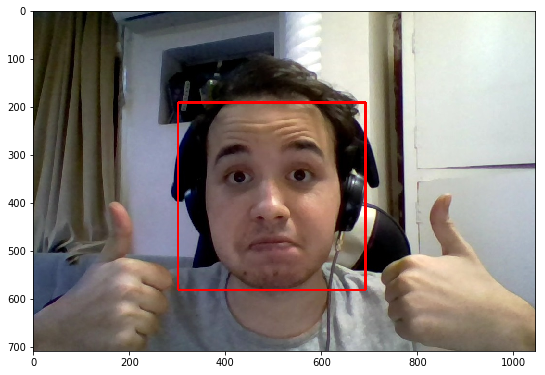

In [3]:
# load in a haar cascade classifier for detecting frontal faces
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# run the detector
# the output here is an array of detections; the corners of each detection box
# if necessary, modify these parameters until you successfully identify every face in a given image
faces = face_cascade.detectMultiScale(image, 1.2, 2)

# make a copy of the original image to plot detections on
image_with_detections = image.copy()

# loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    # draw a rectangle around each detected face
    # you may also need to change the width of the rectangle drawn depending on image resolution
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 

fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)

## Loading in a trained model

Once you have an image to work with (and, again, you can select any image of faces in the `images/` directory), the next step is to pre-process that image and feed it into your CNN facial keypoint detector.

First, load your best model by its filename.

In [4]:
import torch
from models import Net

net = Net()

## TODO: load the best saved model parameters (by your path name)
## You'll need to un-comment the line below and add the correct name for *your* saved model
net.load_state_dict(torch.load('saved_models/keypoints_model_1.pt'))

## print out your net and prepare it for testing (uncomment the line below)
net.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(4, 4), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(4, 4), stride=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(2, 2), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (norm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (norm3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (norm4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (norm5): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=1024, out_features=2048, bias=True)
  (fc2): Linea

## Keypoint detection

Now, we'll loop over each detected face in an image (again!) only this time, you'll transform those faces in Tensors that your CNN can accept as input images.

### TODO: Transform each detected face into an input Tensor

You'll need to perform the following steps for each detected face:
1. Convert the face from RGB to grayscale
2. Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
3. Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
4. Reshape the numpy image into a torch image.

You may find it useful to consult to transformation code in `data_load.py` to help you perform these processing steps.


### TODO: Detect and display the predicted keypoints

After each face has been appropriately converted into an input Tensor for your network to see as input, you'll wrap that Tensor in a Variable() and can apply your `net` to each face. The ouput should be the predicted the facial keypoints. These keypoints will need to be "un-normalized" for display, and you may find it helpful to write a helper function like `show_keypoints`. You should end up with an image like the following with facial keypoints that closely match the facial features on each individual face:

<img src='images/michelle_detected.png' width=30% height=30%/>




(430, 430, 3)


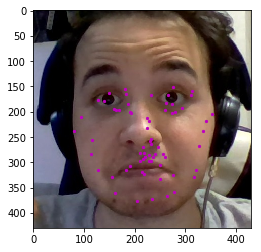

In [5]:
image_copy = np.copy(image)
points=None
img=None
# loop over the detected faces from your haar cascade
for i, (x,y,w,h) in enumerate(faces):
    
    # Select the region of interest that is the face in the image 
    #roi = image_copy[y:y+h, x:x+w]
    padding = 20
    roi = image_copy[y-padding:y+h+padding, x-padding:x+w+padding]
    orig_img= roi
    img = orig_img
    ## TODO: Convert the face region from RGB to grayscale
    roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)

    ## TODO: Normalize the grayscale image so that its color range 
    # falls in [0,1] instead of [0,255]
    roi = roi / 255.0

    
    ## TODO: Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
    roi = cv2.resize(roi, (224,224))
    
    ## TODO: Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
    torch_roi = roi.reshape(1, roi.shape[0], roi.shape[1], 1)
    torch_roi = torch_roi.transpose((0, 3, 1, 2))
    
    # Make facial keypoint predictions using your loaded, trained network 
    # wrap each face region in a Variable and 
    # perform a forward pass to get the predicted facial keypoints
    torch_roi = torch.from_numpy(torch_roi)

    # convert images to FloatTensors
    torch_roi = torch_roi.type(torch.FloatTensor)
    
    ## TODO: Make facial keypoint predictions using your loaded, trained network 
    output_pts = net(torch_roi)

    ## TODO: Display each detected face and the corresponding keypoints
    
    # un-transform the predicted key_pts data
    predicted_key_pts = output_pts.data
    points = output_pts.data
    predicted_key_pts = predicted_key_pts.numpy()
     
    # reshape to 68 x 2 pts
    predicted_key_pts = predicted_key_pts[0].reshape((68, 2))
    
    # undo normalization of keypoints
    output_pts = (predicted_key_pts * 50.0 + 100.0)*430/224
    points = output_pts
   
    fig.add_subplot(1, 2, i+1)
    plt.imshow(orig_img, cmap='gray')
    plt.scatter(output_pts[:,0], output_pts[:,1], s=20, marker='.', c='m')
    print(orig_img.shape)

In [6]:
# import necessary resources
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2

Image shape:  (1123, 3064, 4)


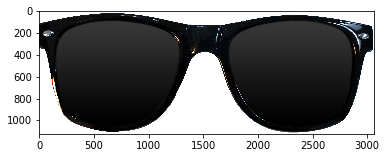

In [7]:
# load in sunglasses image with cv2 and IMREAD_UNCHANGED
sunglasses = cv2.imread('images/sunglasses.png', cv2.IMREAD_UNCHANGED)

# plot our image
plt.imshow(sunglasses)

# print out its dimensions
print('Image shape: ', sunglasses.shape)

The alpha channel looks like this (black pixels = transparent): 


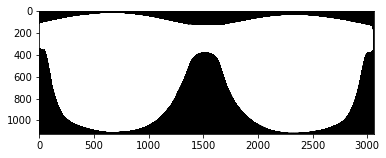

In [8]:
# print out the sunglasses transparency (alpha) channel
alpha_channel = sunglasses[:,:,3]
print ('The alpha channel looks like this (black pixels = transparent): ')
plt.imshow(alpha_channel, cmap='gray')


In [9]:
# just to double check that there are indeed non-zero values
# let's find and print out every value greater than zero
values = np.where(alpha_channel != 0)
print ('The non-zero values of the alpha channel are: ')
print (values)

The non-zero values of the alpha channel are: 
(array([  17,   17,   17, ..., 1109, 1109, 1109], dtype=int64), array([ 687,  688,  689, ..., 2376, 2377, 2378], dtype=int64))


In [11]:
# helper function to display keypoints
def show_keypoints(image, key_pts):
    """Show image with keypoints"""
    plt.imshow(image)
    plt.scatter(faces[0][0]-25+key_pts[:, 0], faces[0][1]-30+key_pts[:, 1], s=30)


Image name:  Hermas


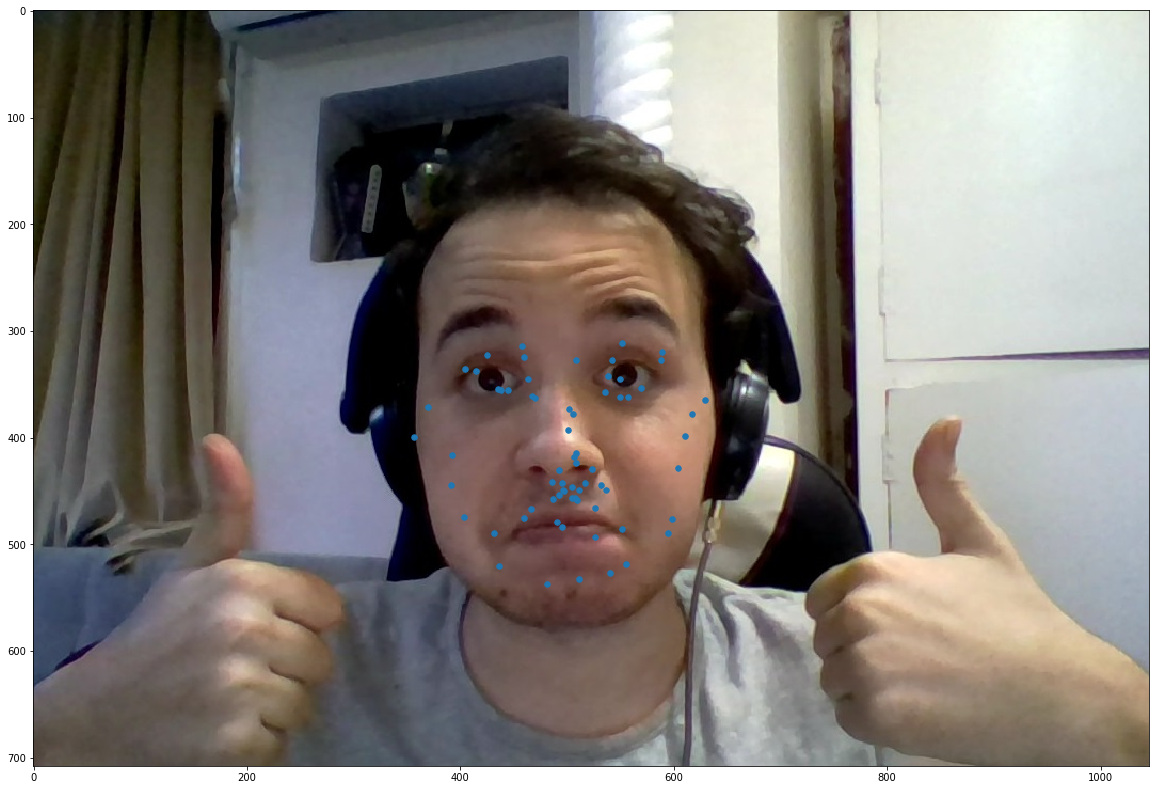

[[ 93.68988  211.08315 ]
 [ 80.63313  239.00906 ]
 [115.89317  256.57678 ]
 [114.785225 284.0294  ]
 [127.272415 314.58524 ]
 [155.51085  329.03574 ]
 [160.63266  360.49362 ]
 [204.87587  377.0034  ]
 [235.14397  372.26007 ]
 [263.98026  366.95383 ]
 [278.7727   357.90997 ]
 [318.30014  329.73853 ]
 [322.07657  315.97705 ]
 [328.36255  268.3073  ]
 [334.73282  238.50993 ]
 [341.07104  218.1554  ]
 [353.16403  204.9895  ]
 [128.38792  175.88313 ]
 [139.03523  177.90605 ]
 [149.16019  162.22922 ]
 [183.63052  163.95256 ]
 [182.02815  154.27083 ]
 [232.34079  166.7389  ]
 [266.3966   166.90398 ]
 [275.35294  151.3785  ]
 [313.0316   159.38966 ]
 [311.8491   167.17436 ]
 [225.37997  213.00981 ]
 [229.35864  217.54308 ]
 [224.5533   232.96355 ]
 [232.09914  254.53186 ]
 [216.55049  270.6419  ]
 [230.12431  257.7432  ]
 [210.08463  281.33334 ]
 [232.31557  263.8535  ]
 [246.92592  269.26944 ]
 [159.30115  194.47708 ]
 [162.42348  195.71736 ]
 [186.95085  185.18286 ]
 [193.73563  202.90503 ]


In [12]:
# a selected image

image = image_copy
key_pts = points
key_pts = key_pts.reshape(-1, 2)


    
print('Image name: ', 'Hermas')

plt.figure(figsize=(20, 20))
show_keypoints(image, key_pts)
plt.show()
print(key_pts)

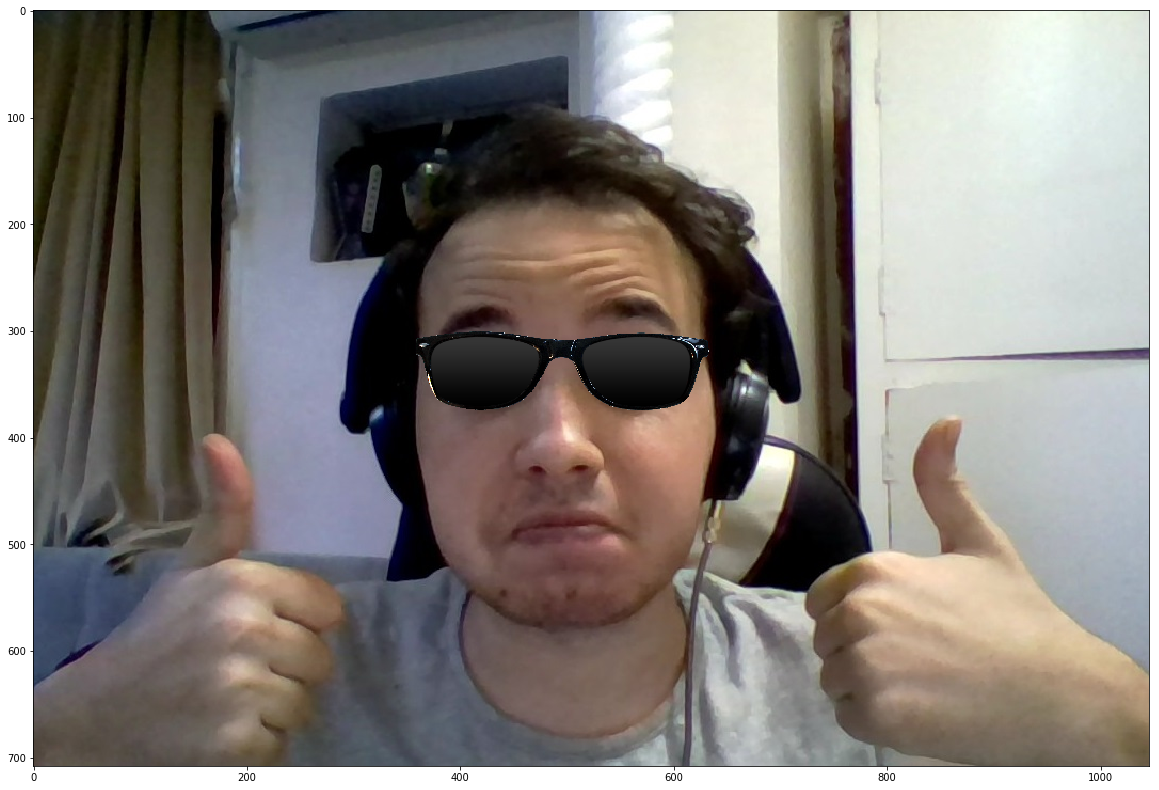

In [25]:
# Display sunglasses on top of the image in the appropriate place

# copy of the face image for overlay
image_copy = np.copy(image)

# top-left location for sunglasses to go
# 17 = edge of left eyebrow
x = faces[0][0]-70+int(key_pts[17, 0])
y = faces[0][1]-65+int(key_pts[17, 1])

# height and width of sunglasses
# h = length of nose
h = int(abs(key_pts[27,1] - key_pts[34,1])*1.5)
# w = left to right eyebrow edges
w = int(abs(key_pts[17,0] - key_pts[26,0])*1.5)

# read in sunglasses
sunglasses = cv2.imread('images/sunglasses.png', cv2.IMREAD_UNCHANGED)
# resize sunglasses
new_sunglasses =  cv2.resize(sunglasses, (w, h), interpolation = cv2.INTER_CUBIC)

# get region of interest on the face to change
roi_color = image_copy[y:y+h,x:x+w]

# find all non-transparent pts
ind = np.argwhere(new_sunglasses[:,:,3] > 0)

# for each non-transparent point, replace the original image pixel with that of the new_sunglasses
for i in range(3):
    roi_color[ind[:,0],ind[:,1],i] = new_sunglasses[ind[:,0],ind[:,1],i]    
# set the area of the image to the changed region with sunglasses
image_copy[y:y+h,x:x+w] = roi_color


# display the result!
plt.figure(figsize=(20, 20))
plt.imshow(image_copy)